In [140]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [141]:
def to_np(a, dtype='float32'):
    return np.array(a, dtype=dtype)

In [142]:
data = pd.read_csv('train.csv')
y = data.y
X = data.drop('y', axis=1)
X.head(10)

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1514,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523
0,37.977273,6.758452,3.636364,10.792929,160.801682,151.109783,1.791689,6.818675,8.138413,8.270161,...,3.663562,5.658393,4.151040,4.540632,4.953183,5.351562,5.311048,5.560922,5.643015,5.715999
1,19.408163,5.933978,2.816327,5.877551,162.949911,76.153796,1.381401,6.002651,5.080499,7.514421,...,3.401197,4.830811,3.817712,4.123094,4.426343,4.823804,4.652173,4.795274,4.860781,5.001426
2,40.265306,7.425645,3.734694,13.160998,172.099640,161.790879,1.603976,7.410120,10.114794,8.805738,...,3.725693,6.397659,4.223177,4.685597,5.116870,5.333926,5.504569,5.797956,6.009581,6.200889
3,43.976744,7.648293,3.837209,14.392765,168.885456,175.277251,1.622298,7.629033,12.180817,9.070719,...,3.725693,5.879135,4.280132,4.563045,5.007714,5.159773,5.393628,5.640132,5.472271,5.741399
4,24.320988,6.534011,3.567901,8.913580,163.076959,96.019681,1.380679,6.566695,4.417010,8.058783,...,4.060443,8.148663,4.624973,5.173321,5.720312,6.259342,6.626469,7.062406,7.472998,7.829842
5,20.924051,6.134299,3.037975,6.506329,165.707039,82.761541,1.381957,6.187547,4.684599,7.660347,...,3.951244,6.087556,4.430817,4.820282,5.183187,5.595176,5.489454,5.604998,5.847522,5.987080
6,34.150000,6.740695,3.733333,10.214815,164.252922,135.639059,1.620887,6.781702,8.631090,8.248393,...,3.912023,6.198225,4.471639,4.801970,5.237107,5.493833,5.573816,5.764799,5.865760,5.998937
7,23.833333,6.395508,3.141026,8.717949,163.221967,94.106131,1.435936,6.443753,5.834402,7.904135,...,4.077537,6.582328,4.600158,5.032071,5.499726,5.978728,5.995208,6.179952,6.364051,6.481290
8,32.380952,6.152543,2.857143,6.402116,164.380868,128.391104,1.687697,6.232890,4.476844,7.736528,...,2.833213,0.000000,3.449988,3.865979,4.506730,4.765906,4.965028,3.840795,3.595598,0.000000
9,45.228571,6.608449,3.714286,9.180952,159.167580,180.141749,1.981354,6.690537,8.428546,8.221041,...,3.332205,5.214936,3.828641,4.234107,4.682131,4.890349,5.192957,5.342334,5.402677,5.303305


1.0    790
0.0    315
Name: y, dtype: int64


(array([315.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 790.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

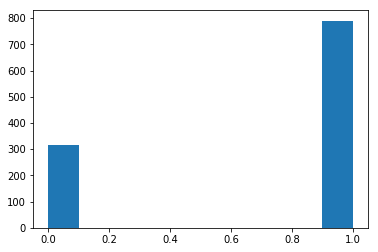

In [143]:
print(y.value_counts())
plt.hist(y)

In [144]:
from sklearn.preprocessing import StandardScaler

def normalize(X):
    norm = StandardScaler().fit_transform(X)
    res = pd.DataFrame(norm, index=X.index, columns=X.columns)
    return res

X = normalize(X)
X.head(10)

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1514,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523
0,0.501596,1.040662,0.977455,1.355874,-0.919769,0.332058,1.131185,1.071287,1.194663,1.090206,...,0.326459,-0.177309,0.178313,-0.001516,-0.090447,-0.094220,-0.257160,-0.176540,-0.207420,-0.176573
1,-0.408465,-0.791084,-1.029208,-0.662793,-0.367166,-0.334964,-0.465523,-0.814110,-0.071706,-0.769249,...,-0.340971,-0.578221,-0.581487,-0.765109,-0.863285,-0.722424,-0.887475,-0.772615,-0.729200,-0.580862
2,0.613731,2.522972,1.218073,2.328402,1.986481,0.427107,0.400668,2.437803,2.013139,2.407961,...,0.484516,0.180819,0.342746,0.263597,0.149671,-0.115213,-0.072028,0.007996,0.037094,0.097767
3,0.795627,3.017632,1.468933,2.834269,1.159675,0.547120,0.471969,2.943593,2.868737,3.059931,...,0.484516,-0.070373,0.472571,0.039474,-0.010453,-0.322511,-0.178160,-0.114873,-0.321313,-0.162202
4,-0.167690,0.542018,0.809925,0.584055,-0.334484,-0.158180,-0.468331,0.489096,-0.346475,0.570120,...,1.336087,1.029070,1.258613,1.155545,1.034877,0.986334,1.001241,0.992401,1.013248,1.019391
5,-0.334172,-0.346028,-0.486826,-0.404564,0.342069,-0.276163,-0.463360,-0.386914,-0.235659,-0.410207,...,1.058295,0.030593,0.816046,0.509907,0.246953,0.195760,-0.086488,-0.142226,-0.071006,-0.023201
6,0.314024,1.001210,1.214744,1.118452,-0.031983,0.194386,0.466480,0.985862,1.398695,1.036646,...,0.958521,0.084205,0.909098,0.476419,0.326049,0.075128,-0.005782,-0.017817,-0.058841,-0.016493
7,-0.191590,0.234303,-0.234656,0.503713,-0.297183,-0.175209,-0.253292,0.205041,0.240507,0.189618,...,1.379574,0.270279,1.202048,0.897227,0.711294,0.652311,0.397343,0.305390,0.273539,0.256411
8,0.227324,-0.305495,-0.929329,-0.447363,0.000929,0.129888,0.726480,-0.282149,-0.321696,-0.222769,...,-1.785868,-2.918446,-1.419692,-1.235320,-0.745362,-0.791341,-0.588182,-1.515699,-1.573124,-3.410555
9,0.856978,0.707397,1.168134,0.693861,-1.340121,0.590408,1.869299,0.775229,1.314816,0.969349,...,-0.516482,-0.392136,-0.556574,-0.562089,-0.488061,-0.643213,-0.370132,-0.346716,-0.367734,-0.410066


In [145]:
def reduce_const_features(X):
    res = X.nunique()
    X.drop(res[res == 1].index, axis=1, inplace=True)
    
reduce_const_features(X)
X.head(10)

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1514,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523
0,0.501596,1.040662,0.977455,1.355874,-0.919769,0.332058,1.131185,1.071287,1.194663,1.090206,...,0.326459,-0.177309,0.178313,-0.001516,-0.090447,-0.094220,-0.257160,-0.176540,-0.207420,-0.176573
1,-0.408465,-0.791084,-1.029208,-0.662793,-0.367166,-0.334964,-0.465523,-0.814110,-0.071706,-0.769249,...,-0.340971,-0.578221,-0.581487,-0.765109,-0.863285,-0.722424,-0.887475,-0.772615,-0.729200,-0.580862
2,0.613731,2.522972,1.218073,2.328402,1.986481,0.427107,0.400668,2.437803,2.013139,2.407961,...,0.484516,0.180819,0.342746,0.263597,0.149671,-0.115213,-0.072028,0.007996,0.037094,0.097767
3,0.795627,3.017632,1.468933,2.834269,1.159675,0.547120,0.471969,2.943593,2.868737,3.059931,...,0.484516,-0.070373,0.472571,0.039474,-0.010453,-0.322511,-0.178160,-0.114873,-0.321313,-0.162202
4,-0.167690,0.542018,0.809925,0.584055,-0.334484,-0.158180,-0.468331,0.489096,-0.346475,0.570120,...,1.336087,1.029070,1.258613,1.155545,1.034877,0.986334,1.001241,0.992401,1.013248,1.019391
5,-0.334172,-0.346028,-0.486826,-0.404564,0.342069,-0.276163,-0.463360,-0.386914,-0.235659,-0.410207,...,1.058295,0.030593,0.816046,0.509907,0.246953,0.195760,-0.086488,-0.142226,-0.071006,-0.023201
6,0.314024,1.001210,1.214744,1.118452,-0.031983,0.194386,0.466480,0.985862,1.398695,1.036646,...,0.958521,0.084205,0.909098,0.476419,0.326049,0.075128,-0.005782,-0.017817,-0.058841,-0.016493
7,-0.191590,0.234303,-0.234656,0.503713,-0.297183,-0.175209,-0.253292,0.205041,0.240507,0.189618,...,1.379574,0.270279,1.202048,0.897227,0.711294,0.652311,0.397343,0.305390,0.273539,0.256411
8,0.227324,-0.305495,-0.929329,-0.447363,0.000929,0.129888,0.726480,-0.282149,-0.321696,-0.222769,...,-1.785868,-2.918446,-1.419692,-1.235320,-0.745362,-0.791341,-0.588182,-1.515699,-1.573124,-3.410555
9,0.856978,0.707397,1.168134,0.693861,-1.340121,0.590408,1.869299,0.775229,1.314816,0.969349,...,-0.516482,-0.392136,-0.556574,-0.562089,-0.488061,-0.643213,-0.370132,-0.346716,-0.367734,-0.410066


In [146]:
def reduce_features_pearson(X, threshold=0.7):
    pearson_coef = X.corr()
    res = []
    
    for i, x in enumerate(pearson_coef.columns):
        col = pearson_coef[x]
        
        for j in range(i):
            if abs(col[j]) > threshold:
                res.append(x)
                break
                
    X.drop(res, axis=1, inplace=True)
    
reduce_features_pearson(X)
X.head(10)

,feature-0,feature-1,feature-2,feature-4,feature-104,feature-111,feature-112,feature-114,feature-115,feature-116,...,feature-1448,feature-1450,feature-1460,feature-1465,feature-1476,feature-1480,feature-1486,feature-1488,feature-1492,feature-1510
0,0.501596,1.040662,0.977455,-0.919769,0.301970,0.114540,0.071534,-0.630219,0.425550,-0.506016,...,-0.198773,-0.387323,0.852490,-0.859199,-0.264069,1.239912,-0.156062,-0.402251,-0.104781,-0.203847
1,-0.408465,-0.791084,-1.029208,-0.367166,-0.533582,-0.355543,0.395445,-1.001441,-0.064859,0.602463,...,-0.198773,-0.387323,0.852490,-0.859199,-0.264069,-0.668309,-0.156062,-0.402251,-0.104781,-0.203847
2,0.613731,2.522972,1.218073,1.986481,2.328320,-0.115908,-0.244904,0.231320,0.723035,-0.241127,...,-0.198773,-0.387323,3.606881,-0.859199,-0.264069,1.239912,-0.156062,-0.402251,-0.104781,-0.203847
3,0.795627,3.017632,1.468933,1.159675,0.325521,1.111192,-2.141184,-1.328370,-1.568069,-0.937310,...,-0.198773,-0.387323,2.229686,-0.859199,-0.264069,-0.668309,-0.156062,-0.402251,-0.104781,-0.203847
4,-0.167690,0.542018,0.809925,-0.334484,-0.594897,0.168392,0.039851,0.971386,0.404246,-0.587361,...,-0.198773,-0.387323,-0.524705,0.195706,-0.264069,3.148133,-0.156062,2.137677,-0.104781,-0.203847
5,-0.334172,-0.346028,-0.486826,0.342069,0.300570,-0.190200,0.262020,-0.513226,0.298825,-0.020331,...,-0.198773,-0.387323,-0.524705,0.195706,-0.264069,1.239912,4.915948,2.137677,-0.104781,-0.203847
6,0.314024,1.001210,1.214744,-0.031983,0.150639,1.517268,-0.109521,0.027345,0.050465,-1.381715,...,-0.198773,-0.387323,0.852490,-0.859199,-0.264069,1.239912,-0.156062,-0.402251,-0.104781,-0.203847
7,-0.191590,0.234303,-0.234656,-0.297183,-0.298149,-0.203811,0.182925,-0.237650,0.543468,-0.567310,...,-0.198773,-0.387323,0.852490,-0.859199,-0.264069,-0.668309,-0.156062,-0.402251,-0.104781,-0.203847
8,0.227324,-0.305495,-0.929329,0.000929,0.335926,-0.671595,-0.053309,-1.068669,0.583578,-0.294340,...,-0.198773,-0.387323,-0.524705,-0.859199,-0.264069,-0.668309,-0.156062,-0.402251,-0.104781,-0.203847
9,0.856978,0.707397,1.168134,-1.340121,0.343503,0.979540,-0.048216,-0.093153,-0.271105,0.565931,...,-0.198773,-0.387323,0.852490,-0.859199,-0.264069,1.239912,-0.156062,-0.402251,-0.104781,-0.203847


In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, shuffle=True, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
# print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
# print(y_val.shape)

(828, 245)
(277, 245)
(828,)
(277,)


In [197]:
def random_minibatches(X, y, minibatch_size = 64):
    shuffled_X = X.sample(frac=1)
    shuffled_y = y.reindex(index=shuffled_X.index)
    res = []
    num_minibatches = X.shape[0] // minibatch_size
    
    for i in range(num_minibatches):
        res.append((X.iloc[i * minibatch_size : (i + 1) * minibatch_size], y.iloc[i * minibatch_size : (i + 1) * minibatch_size]))
        
    if X.shape[0] % minibatch_size != 0:
        res.append((X.iloc[num_minibatches * minibatch_size :], y.iloc[num_minibatches * minibatch_size :]))
        
    return res, shuffled_X, shuffled_y

In [202]:
from sklearn.base import BaseEstimator

class DFS(BaseEstimator):
    def __init__(self, hidden_layers_sizes=[93, 93, 128, 64, 3], 
                 minibatch_size=100, learning_rate=0.1, 
                 lambda1=0., lambda2=1., 
                 alpha1=1e-3, alpha2=0.,
                 num_epochs=1000, dropout_rate=0.25):
        self.hidden_layers_sizes = hidden_layers_sizes
        self.minibatch_size = minibatch_size
        self.learning_rate = learning_rate
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.num_epochs = num_epochs
        self.dropout_rate = dropout_rate
        
    def init_weights(n_f):
        W = []
        b = []
        
        W.append(f.get_variable('W0', shape=[n_f, self.hidden_layers_sizes[0]], initializer=tf.contrib.layers.xavier_initializer()))
        b.append(tf.get_variable('b0', shape=[self.hidden_layers_sizes[0]], initializer=tf.zeros_initializer()))
        
        for i in range(1, len(self.hidden_layers_sizes)):
            W.append(tf.get_variable('W{}'.format(i), shape=[self.hidden_layers_sizes[i-1], self.hidden_layers_sizes[i]], initializer=tf.contrib.layers.xavier_initializer()))
            b.append(tf.get_variable('b{}'.format(i), shape=[self.hidden_layers_sizes[i]], initializer=tf.zeros_initializer()))
            
        return W, b
    
    def forward_prop(X_tf, dropout_rate_tf):
        L = len(self.hidden_layers_sizes) + 1
        res = X_tf * self.w
        
        for i in range(L - 1):
            z = tf.matmul(res, W[i]) + b[i]
            a = tf.nn.relu(z)
            res = tf.nn.dropout(a, keep_prob=dropout_rate_tf)
            
        z = tf.matmul(res, W[L - 1]) + b[L - 1]
        self.res = tf.nn.softmax(z)
        
    def elastic_net(w, l1, l2):
        return l1 * ((1 - l2) / 2 * (tf.norm(w, 2) ** 2) + l2 * tf.norm(w, 1))
        
    def compute_cost(labels):
        log_likelihood_loss = tf.reduce_sum(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=self.res, labels=labels))
        w_loss = elastic_net(self.w, self.lambda1, self.lambda2)
        W_loss = tf.reduce_sum([elastic_net(x, self.alpha1, self.alpha2) for x in W])
        self.cost = tf.reduce_sum(log_likelihood_loss + w_loss + W_loss)
        
    def create_optimizer():
        self.optimizer = tf.train.AdamOptimizer(self.learning_rate).minimize(self.cost)
        
    def build_model(n_f):
        tf.reset_default_graph()
        X_tf = tf.placeholder(dtype=tf.float32, shape=[None, None], name='X')
        y_tf = tf.placeholder(dtype=tf.float32, shape=[None], name='y')
        dropout_rate_tf = tf.placeholder(dtype=tf.float32, shape=None, name = 'dropout_rate')
        W, b = init_weights(n_f)
        self.w = tf.get_variable('w', shape=[n_f], initializer=tf.ones_initializer())
        forward_prop(X_tf, dropout_rate_tf)
        compute_cost()
        create_optimizer()
        self.X_tf = X_tf
        self.y_tf = y_tf
        self.dropout_rate_tf = dropout_rate_tf
        return X_tf, y_tf, dropout_rate_tf
        
    def fit(self, X, y):
        X_tf, y_tf, dropout_rate_tf = build_model(X.shape[1])
        init = tf.global_variables_initializer()
        
        with tf.Session() as sess:
            self.sess = sess
            sess.run(init)
        
            for i in range(self.num_epochs):
                minibatches, shuffled_X, shuffled_y = random_minibatches(X, y)
                epoch_cost = 0.

                for minibatch in minibatches:
                    _, cost = sess.run([self.optimizer, self.cost], feed_dict={X_tf: minibatch[0], y_tf: minibatch[1], dropout_rate_tf: self.dropout_rate})
                    epoch_cost += cost / len(minibatches)
                    
                print("Cost after epoch {} = {}", i, np.round(epoch_cost, 3))
                
    def predict(self, X):
        return np.argmax(self.sess.run(self.res, feed_dict={self.X_tf: X, self.dropout_rate_tf: 1.}))
    
    def extract_features(self, X, n_f):
        w = self.sess.run(self.w)
        res = sorted(zip(X.columns, w), key=lambda x: abs(x[1]))
        return [res[-i][0] for i in range(1, n_f + 1)]

In [203]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import GridSearchCV

mlp = MLP(solver='lbfgs', activation='logistic', alpha=1e-5)
mlp_parameters = {'hidden_layer_sizes':[(100, 50)]}
clf = GridSearchCV(mlp, mlp_parameters, cv=5)

In [204]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(100, 50)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [205]:
ans = clf.predict(X_test)

In [206]:
print(ans)
print(y_test)

[1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
746     1.0
439     1.0
242     0.0
655     1.0
555     1.0
338     1.0
1052    1.0
9       0.0
599     1.0
851     1.0
1063    1.0
726     1.0
1072    1.0


In [207]:
from sklearn.metrics import f1_score, accuracy_score, matthews_corrcoef

def calc_metrics(y_true, y_pred, dataset_name='test'):
    print('Accuracy score for {} set: {}'.format(dataset_name, np.round(accuracy_score(y_true, y_pred), 3)))
    print('F1 score for {} set: {}'.format(dataset_name, np.round(f1_score(y_true, y_pred), 3)))
    print('Matthews corr coef score for {} set: {}'.format(dataset_name, np.round(matthews_corrcoef(y_true, y_pred), 3)))

In [208]:
calc_metrics(y_test, ans)

Accuracy score for test set: 0.834
F1 score for test set: 0.887
Matthews corr coef score for test set: 0.577
